# Categorization of ECG signals

In this notebook, the Take-Home Technical Test: ECG Heartbeat Categorization is performed
Let's begin!

# Data description
The dataset used in this project is focused on heartbeat classification using deep neural network architectures and explores the capabilities of transfer learning. It consists of electrocardiogram (ECG) signals representing different types of heartbeats. These heartbeats include normal cases as well as those affected by arrhythmias and myocardial infarction. The dataset has been preprocessed and segmented, with each segment corresponding to a single heartbeat.

The Arrhythmia Dataset contains a total of **109,446** samples and is categorized into five classes. The sampling frequency of the ECG signals is **125 Hz**, which indicates that the signals were recorded at a rate of 125 samples per second. The dataset is sourced from Physionet's MIT-BIH Arrhythmia Dataset, a well-known resource in the field of biomedical signal processing. The classes in this dataset are represented by the following labels: **'N' (0), 'S' (1), 'V' (2), 'F' (3), and 'Q' (4)**. These labels correspond to different types of arrhythmias and myocardial infarction cases.

Based on the [1], the data belongs to five heart beat types including **normal beat (NOR), left bundle branch block beat (LBB), right bundle branch block beat (RBB), premature ventricular contraction beat (PVC), and atrial premature contraction beat (APC)**

### <font color='orange'> Please change the directory of the notebook to the EEG_MLops folder

In [1]:
import os
os.chdir('/Volumes/Projects/Gtihub/ECG_MLops/')

# Task1

In the initial phase, we load the raw data, after which we generate and export both the training and test features, along with their corresponding labels, to a pickle file. While this approach may appear redundant given the manageable size of the current project's dataset, it's important to consider its utility for future projects that may entail larger datasets. Hence, adopting this method now provides us a head start in establishing more scalable data handling practices for the future.

In [2]:
%run src/data/make_dataset.py

Number of training examples:  87554
Number of test examples:  21892


## Raw Data and Checking distribution of classes 

##### **Fig1.** illustrates the mean of each class raw signal alongside their respective standard deviations. It is evident from the figure that significant differences exist among all classes. However, the 'NOR' and 'RBB' classes appear to have closely aligned characteristics, exhibiting a notable exception to this trend. 

##### **Fig2.** by observing this figure, it's apparent that the number of trials pertaining to the first class, identified as 'normal', substantially outweighs that of other classes. This disproportion is a common issue encountered in healthcare datasets, primarily due to the significantly higher number of healthy individuals compared to those diagnosed with illnesses.

##### In addition, the ratio of the remaining four classes to the first is presented here. It becomes pertinent to consider potential solutions such as data augmentation techniques to address this imbalance. This initial exploration, or the 'raw plot' section, is merely a preliminary analysis intended to provide insights into the structure and class distribution of the data.

In [2]:
%run src/visualization/visualize.py

Number of training examples:  87554
Number of test examples:  21892
Class 0 has 72471 trials
Class 1 has 2223 trials
Class 1 fraction to class 0 is 32.60053981106613
Class 2 has 5788 trials
Class 2 fraction to class 0 is 12.520905321354526
Class 3 has 641 trials
Class 3 fraction to class 0 is 113.05928237129486
Class 4 has 6431 trials
Class 4 fraction to class 0 is 11.269009485305551


<div style="display: flex;">
    <figure>
        <img src="../reports/figures/comparing_average.jpg" alt="Alt text" style="width:400px;"/>
        <figcaption>Fig.1. Mean and std across all trials for each class.</figcaption>
    </figure>
    <figure>
        <img src="../reports/figures/comparing_train_test.jpg" alt="Alt text" style="width:700px;"/>
        <figcaption>Fig.2. Distribution of all classes across train and test.</figcaption>
    </figure>
</div>


## Feature Extraction

#### Numerous feature extraction methods exist for ECG data, ranging from simple statistical measures, such as mean and variance, to more sophisticated frequency domain features. To glean meaningful insights from the data, I've leveraged research papers that discuss both traditional and contemporary feature extraction techniques applicable to ECG signals.


 #### **Statistical features** 

##### In order to extract statistical features from the signal, I utilized methodologies outlined in the paper by Kaur Singh et al. [1]


1.Mean
 
2.Standard deviation

3.Median

4.Maximum value

5.Minimum value

6.Range

7.Interquartile range

8.Interquartile first quarter (Q1)

9.Interquartile third quarter (Q3)

10.Kurtosis

11.Skewness of ECG signal

##### These features were extracted from train and test array which results in 2D array with shape of (trials,11). 

 #### **Frequency Band Power**

##### Another strategy I employed focused on extracting the average frequency of critical bands from ECG data. This is similar to the process used in EEG data analysis where vital rhythms such as theta and gamma are identified. For ECG signals, certain frequency bands also carry significant information. Typically, the frequency spectrum of a normal ECG signal ranges from 0.01 to 100 Hz, with 90% of the signal's energy concentrated between 0.25 Hz and 35 Hz [2]. 
##### Accordingly, I used the Fourier Transform and the Welch method to extract the average power across seven different bands: 0.1-5Hz, 5-10Hz, 10-15Hz, 15-20Hz, 20-25Hz, 25-30Hz, and 30-35Hz [3]. This approach yielded a 2D array with a shape of (trial, 7).

Note: Ideally, one would filter the signal between 0.1 and 100 Hz prior to extracting the average power. However, due to our sampling rate of 125 Hz, this wasn't feasible because the bandwidth of the high-frequency band must be less than half the sampling rate, as per the Nyquist theorem.

 #### **Heartbeat Features in ECG Data**

##### The final technique involved extracting features from the QRS complex. Although I explored various methods to achieve this, accurately extracting specific features was challenging due to the single heart rate. Consequently, I turned to multiple research papers to guide the extraction of meaningful features. These included:

R-Peak Amplitude

R-Peak Duration

P-Wave Amplitude

P-Wave Duration

PR Interval

QRS Duration

QT Interval

ST Segment

T-Wave Amplitude

T-Wave Duration

##### This approach resulted in a 2D array with a shape of (trials, 10).

<figure>
    <img src="../reports/figures/ECG.png" alt="Alt text" style="width:600px;"/>
    <figcaption>Fig.3. ECG signal [4].</figcaption>
</figure>

#### All the features mentioned above were computed and preserved as a pickle file, laying the groundwork for future classification steps.

#### **Data Augmentation**

#### Data augmentation techniques are widely used in image classification tasks, employing various methods such as flipping and cropping to expand the dataset. However, when it comes to time-series signals such as ECG data, the application of data augmentation becomes more complex. Here we used two methods from two papers.

##### **1. SpecAugment**

The SpecAugment method modifies the spectrogram of an input audio signal through time warping, frequency masking, and time masking.

1. Time warping is a deformation of the spectrogram in the time direction.

2. Frequency masking is where a block of consecutive frequencies is masked (set to zero), simulating a loss of all information in these frequency bands.

3. Time masking is similar but applied along the time axis, simulating a loss of all information in a segment of time.

The method proposed by Kiyasseh et al. [5] was leveraged to implement the SpecAugment approach on our dataset. This method enabled us to generate between 2 to 10 augmented signals from each original ECG signal. The choice of how many augmented signals to generate was determined based on the ratio of the number of samples in each class to number of samples of class 0 (Normal). 

**Class 0:** 1 new signals per 1 signal

**Class 1:** 6 new signals per 1 signal

**Class 2:** 4 new signals per 1 signal

**Class 3:** 8 new signals per 1 signal

**Class 4:** 4 new signals per 1 signal

For the first class, we applied the SpecAugment method to each ECG signal, effectively doubling the sample size for this class. However, recognizing that this approach might over-represent the first class, we further refined our strategy. We selected only 5000 of the newly generated samples to add to the overall dataset. This approach ensured that the first class was not disproportionately represented. It enriched the data with novel variations, while maintaining a balanced dataset to prevent any potential bias in subsequent analyses.

A sample of augmented data is represned in Fig.4.

##### **2. Regular Augmenting Methods**

We have used three other popular methods for augmenting ECG data based on the Nonaka et al. method. 

**Adding Noise:** This method involves adding a small amount of random noise to the original ECG signal. The noise could be Gaussian, white, or any other type of statistical noise. By adding noise, the model learns to extract and focus on the key features of the ECG signal, making it more robust against variations in real-world data.

**Scaling:** Scaling involves changing the amplitude of the ECG signal. It can be done either by a constant factor or randomly within a certain range. Scaling helps the model to handle variations in signal strength that might occur due to differences in measurement devices or individual patients' physiological differences.

**Time Shifting:** Time shifting involves moving the ECG signal along the time axis. For example, a portion of the signal might be cut from the beginning and added to the end, effectively shifting the entire signal in time. This dataset presents a special case for the time-shifting augmentation method. Given that the signals are predominantly zero-padded at the end, shifting these signals to the right effectively results in the addition of zero values at the beginning, generating new representations of the original data. 

This augmentation technique effectively doubled the number of samples for each class. However, to avoid an oversaturation of class zero instances, the same policy as the previous method was applied. This meant that only an additional 5000 samples were selected from the augmented class zero data, ensuring a balanced distribution across classes. Therefore, you can see in Fig.5 20000 samples were added to class 1 and lots of new samples to other classes. 


<figure>
    <img src="../reports/figures/spec_aug.jpg" alt="Alt text" style="width:800px;"/>
    <figcaption>Fig.4. Data augmentation using SpecAugment.</figcaption>
</figure>
<figure>
    <img src="../reports/figures/aug_train.jpg" alt="Alt text" style="width:800px;"/>
    <figcaption>Fig.5. Distribution of all classes across train and test in augmentation dataset.</figcaption>
</figure>


In [10]:
%run src/features/build_features.py

/Users/farazmoradi/miniconda3/envs/tensorflow/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 187, using nperseg = 187
  warnings.warn('nperseg = {0:d} is greater than input length '


All features are saved


/Users/farazmoradi/miniconda3/envs/tensorflow/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 187, using nperseg = 187
  warnings.warn('nperseg = {0:d} is greater than input length '


Class 0 has 20000 trials
Class 1 has 33345 trials
Class 1 fraction to class 0 is 0.599790073474284
Class 2 has 63668 trials
Class 2 fraction to class 0 is 0.3141295470251932
Class 3 has 12179 trials
Class 3 fraction to class 0 is 1.6421709499958945
Class 4 has 70741 trials
Class 4 fraction to class 0 is 0.2827214769369955


#### **Converting Signal to Image using Short Time Fourier Transfrom**

As mentioned earlier, the Fourier Transform is valuable for extracting information about different frequency bands. However, one limitation of the Fourier Transform is that it doesn't provide information about when a specific frequency occurred in the time domain signal. While you can observe a peak at a particular frequency, you won't know the corresponding time at which the event or phenomenon took place.

To address this limitation, other time-frequency analysis techniques can be employed. One popular method is the Short-Time Fourier Transform (STFT), which allows you to analyze the frequency content of a signal over short time intervals. This technique breaks down the signal into overlapping segments and computes the Fourier Transform for each segment. By doing so, you can obtain time-dependent frequency information, enabling you to identify when specific frequencies occur throughout the signal.

Converting the ECG signal to an image format can indeed make it more compatible with deep learning models like Convolutional Neural Networks (CNNs). By adjusting the Short-Time Fourier Transform (STFT) parameters and generating square matrices, the resulting spectrogram-like images can be readily processed using the filter operations of CNNs.

Each signal was converted to a 25*25 image which is a perfect shape for a deep learning model and transfer learning methods (Fig.6). 

In [5]:
%run src/features/STFT.py

(199933, 25, 25)


<figure>
    <img src="../reports/figures/stft.jpg" alt="Alt text" style="width:600px;"/>
    <figcaption>Fig.6. Comapring STFT of the Original and Augmented.</figcaption>
</figure>

### Outliers for future purposes

In [ ]:
%run src/features/remove_outliers.py

# Task 2, 3

## Classic Machine Learning

As previously mentioned, three sets of features were extracted from the ECG data: **Basic Statistical Features, Band Power Features, Heartbeat Features**
We have extracted these features from X_train and X_test. We designed a machine learning classifier to perform the classification task as below:

1. Selecting which feature to use (Stat, Band Power, Heartbeat).
2. Make a validation set (20%) from X_train and make sure to shuffle and stratify.
3. Apply PCA with desired number of components on new X_train and X_val.
4. Using random forest with grid search to find the best parameters. 
5. Fit the model using new X_train and evalute with X_val.
6. Plotting all metrics and explained variance by PCA. 
7. Using X_train as a hold out set to check the performance of the model. 
8. Comapting the results accross all three features. 

### Results

From the analysis of the confusion matrix, it becomes evident that although the overall accuracy of the model appears to be high, there are underlying issues that need attention. The observed biases and imbalances in class distribution have influenced the model's behavior and performance.

The dominance of class 0, due to its large amount of data, has caused the model to become biased towards predicting class 0 in most instances. This bias results in a misleadingly high accuracy, as the model can achieve reasonable performance by simply predicting class 0 for all samples.

When focusing on the heartbeat feature, it is apparent that the model exhibits some success in classifying other classes apart from class 0. However, the performance for class 1 is particularly poor, suggesting a clear difficulty in accurately distinguishing this class.

To address these challenges and enhance the model's performance, data augmentation becomes necessary. We will use that in future presented models.

results for stat features
Grid serach has started
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.3s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.3s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.3s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.4s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total ti

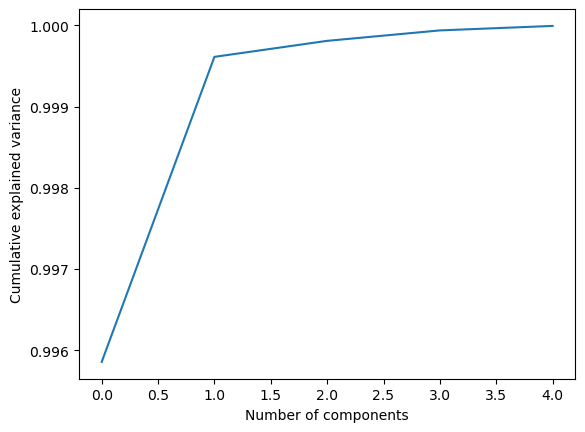

Accuracy: 0.8688824167666038
Precision: 0.6511676682872497
Recall: 0.32655255094962643
F1 Score: 0.3678519471028737


/Users/farazmoradi/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


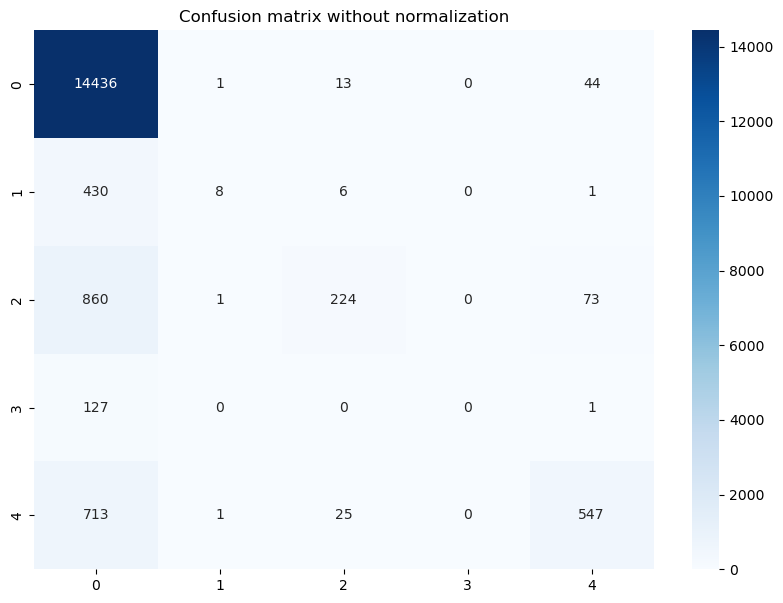

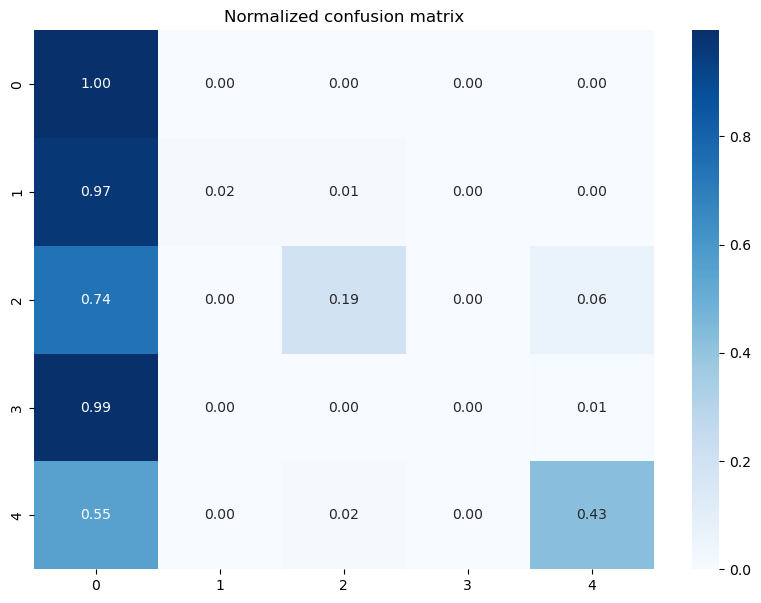

Accuracy: 0.8639685729947013
Precision: 0.6421672501799807
Recall: 0.3139332578524612
F1 Score: 0.3511563091981637


/Users/farazmoradi/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


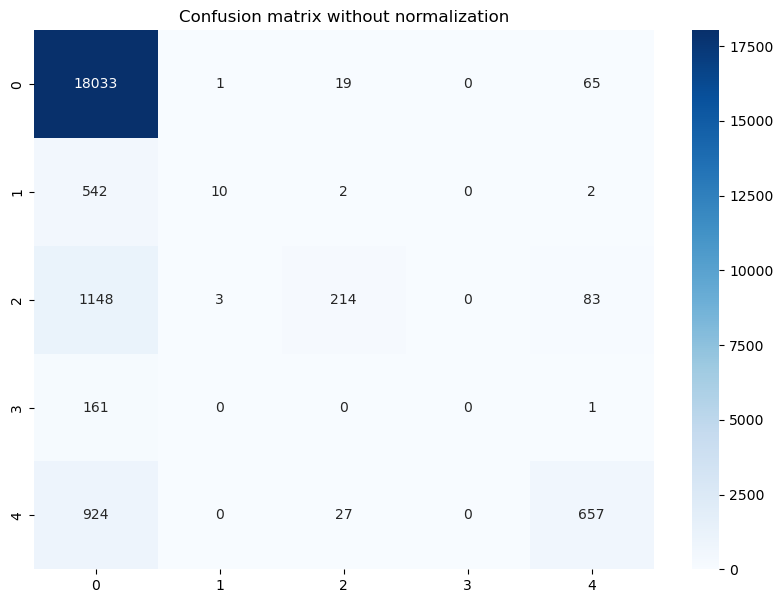

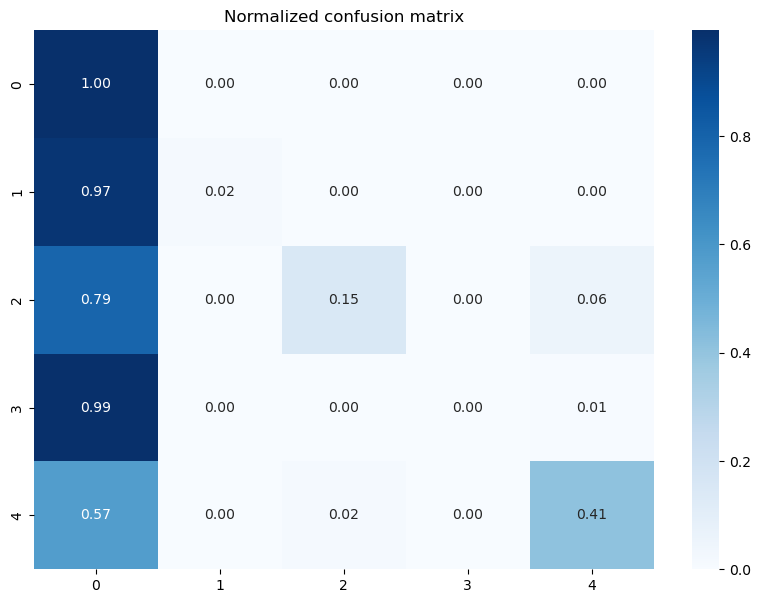

Explained variance ratio:  [9.95832881e-01 3.78887635e-03 1.88585625e-04 1.28139537e-04
 5.39307911e-05]


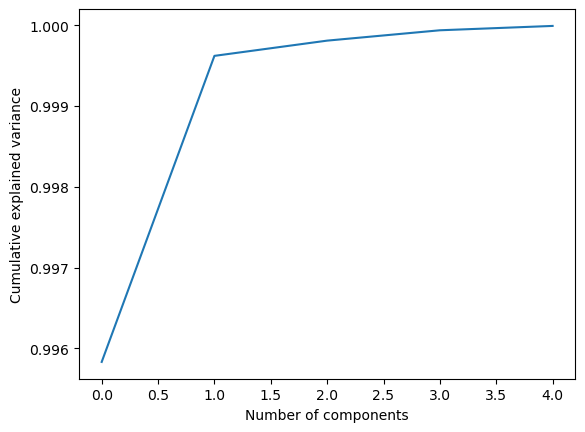

results for psd features
Grid serach has started
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.1s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.1s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total tim

/Users/farazmoradi/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


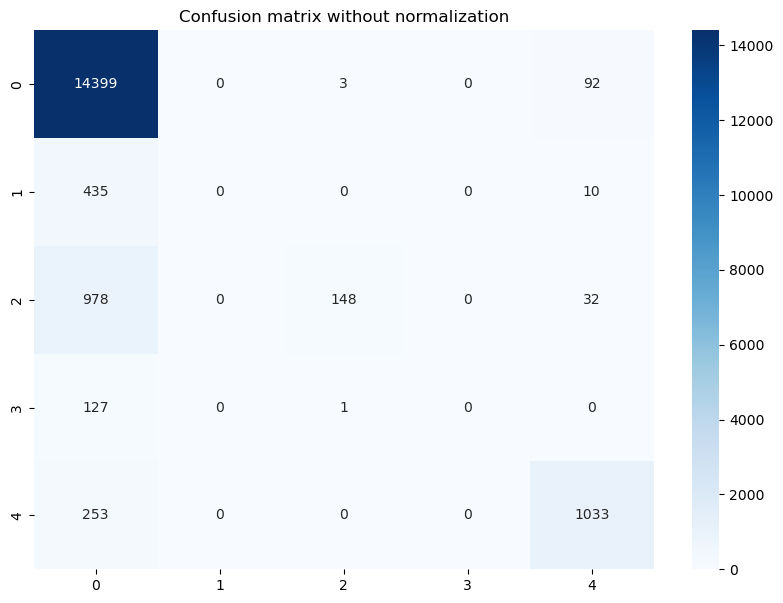

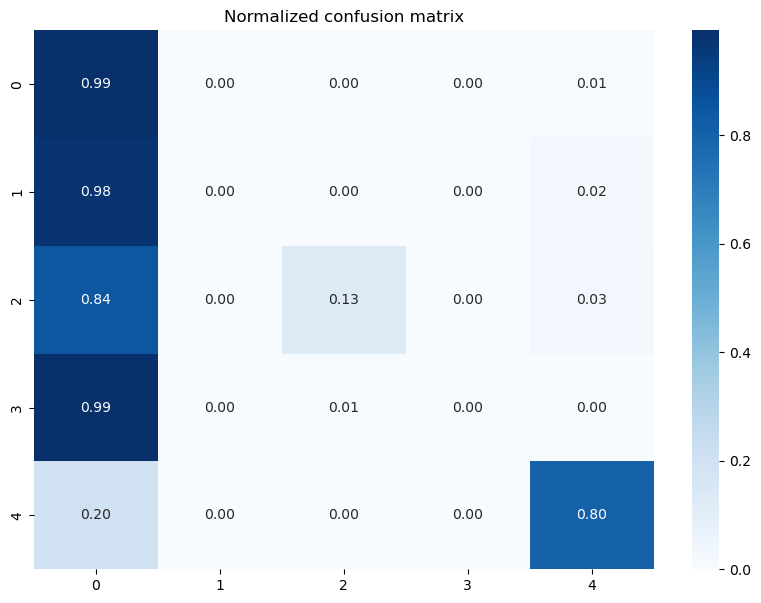

Accuracy: 0.8861227845788416
Precision: 0.5388716704834339
Recall: 0.3772368575545634
F1 Score: 0.3929021740219105


/Users/farazmoradi/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


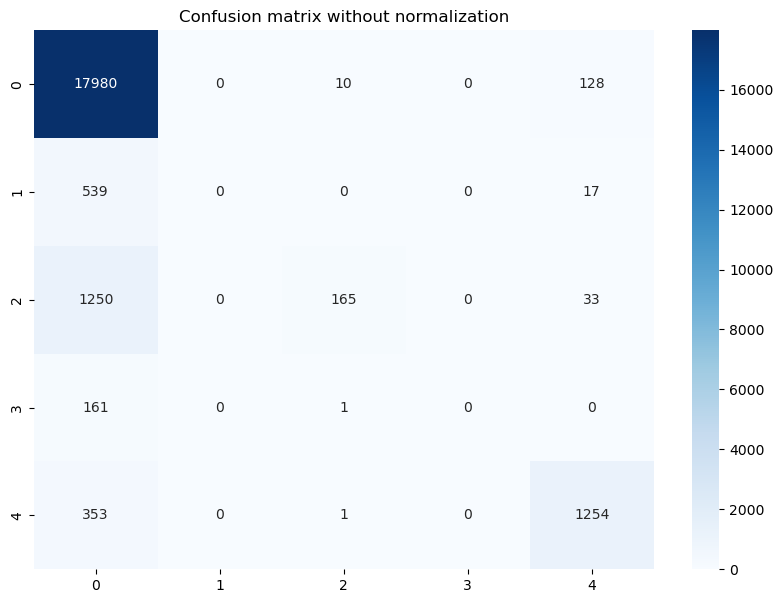

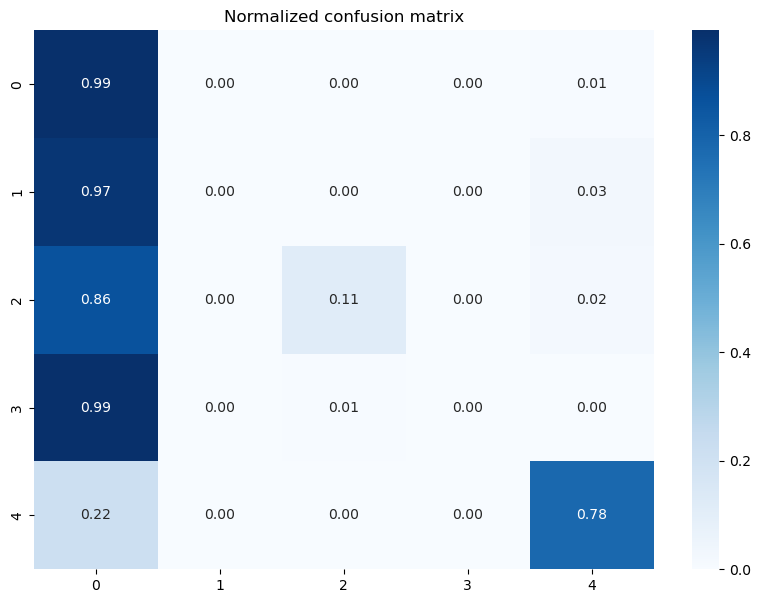

results for beat features
Grid serach has started
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.9s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total ti

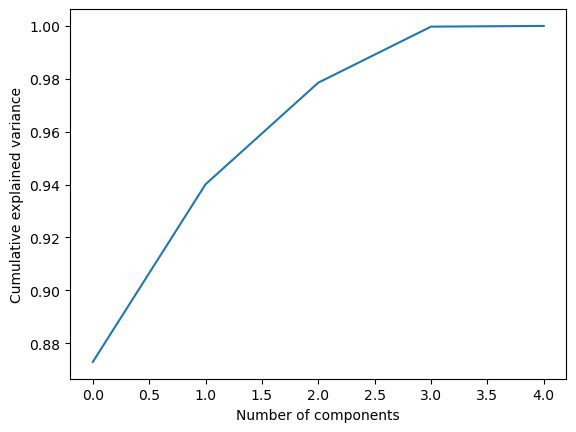

Accuracy: 0.8592884472617212
Precision: 0.8232974872845278
Recall: 0.3221591609922543
F1 Score: 0.3727963038994206


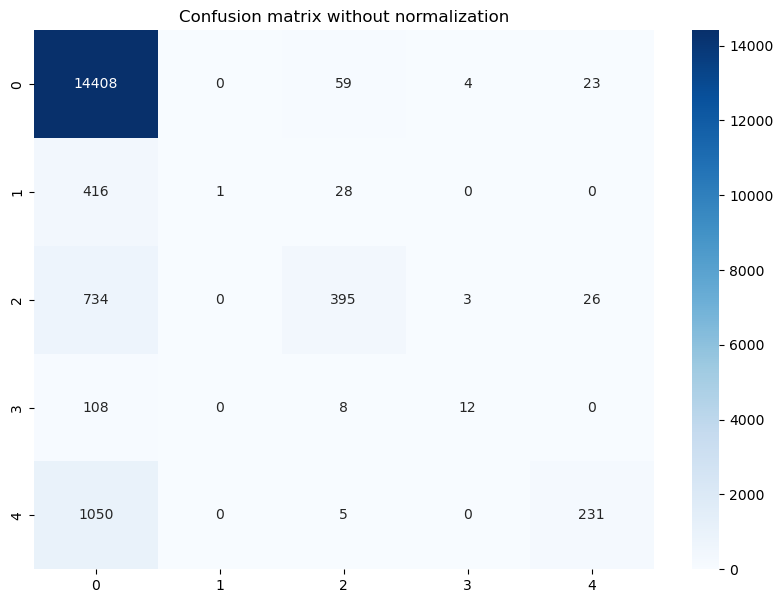

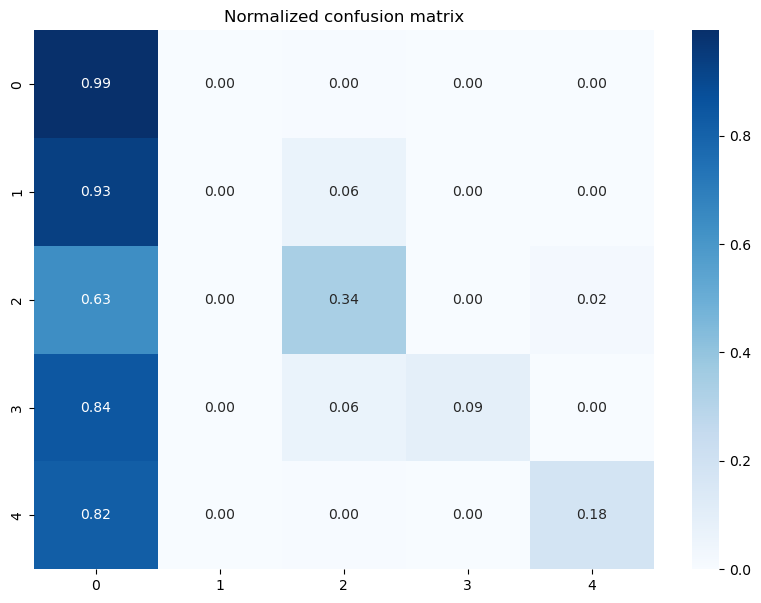

Accuracy: 0.857573542846702
Precision: 0.6365074738451144
Recall: 0.32641726372297974
F1 Score: 0.38006065130905164


/Users/farazmoradi/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


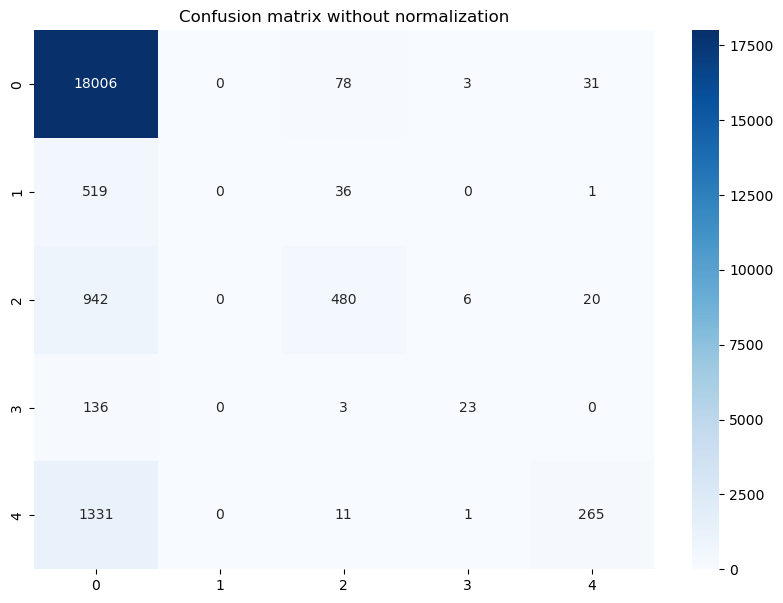

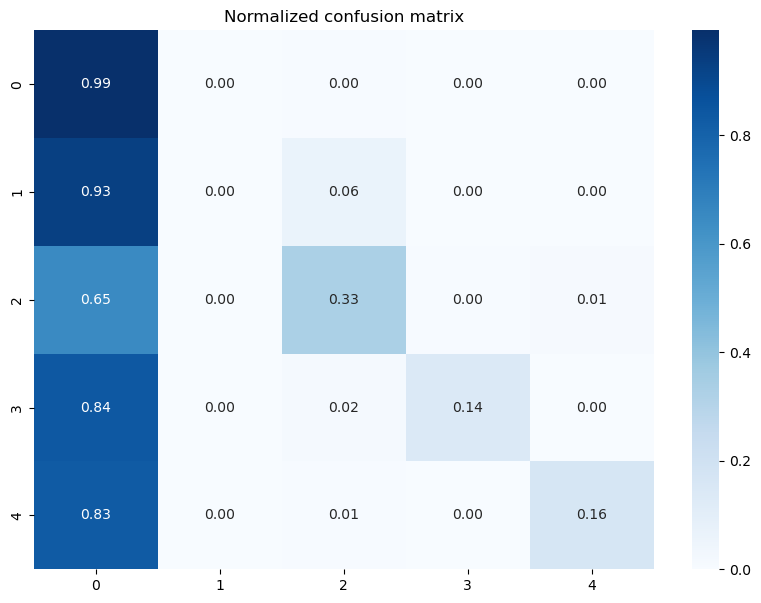

Explained variance ratio:  [8.76473487e-01 6.43869336e-02 3.78012985e-02 2.11987797e-02
 1.39501701e-04]


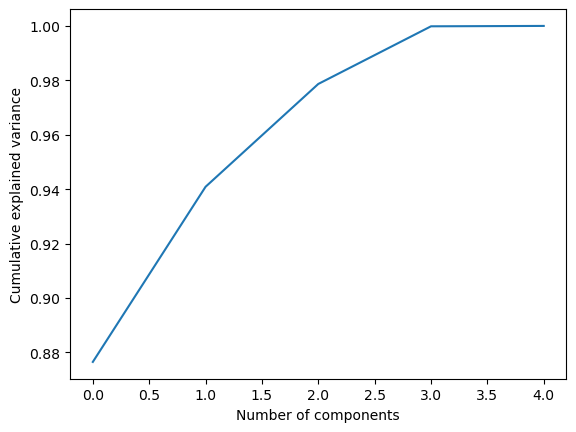

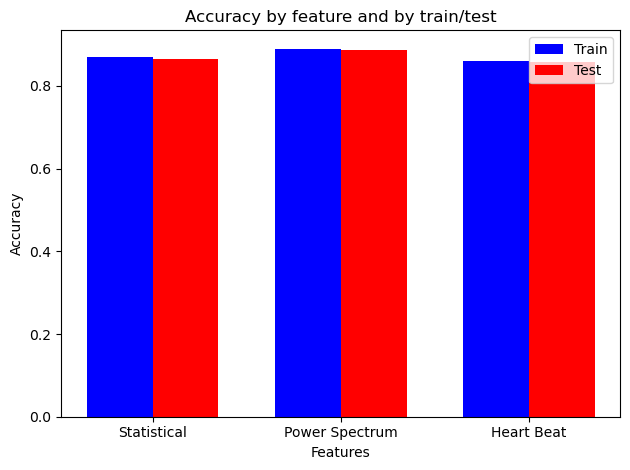

In [2]:
%run src/models/train_model.py

## Deep Learning

#### As previously discussed, we have successfully converted the signals into images, which now allows us to train a deep learning model with our data. For the purpose of monitoring the training process, I have utilized MLflow. Additionally, I have employed Optuna to find the optimal hyperparameters for our model. The following instructions will guide you on how to run the code:

1. path  for choosing original stft data or original stft data + augmented stft data for training and testing

    <font color='orange'> raw stft data = 'data/processed/01_data_stft.pkl'
    
    <font color='orange'> raw stft data + augmented stft data = 'data/processed/01_data_aug_stft.pkl'

  <font color='white'> 

2. define the range of learning rate that you want. I realized with optuna 0.001 - 0.002 is the best range
3. range of the batch size. between 128 - 512 was the best. 
4. number of combinations that you want for optuna to run. choose 1 if you want a simple run with
5. number of epochs
6. the number of times if the loss does not decrease from the desired threshold to stop the training
7. mentioned threhsold above

#### Asnwering of some questions from task  2:

**Early stopping point**

The rationale behind early stopping is to prevent overfitting and improve generalization of the machine learning model. Overfitting occurs when the model becomes too complex and starts to memorize the training data instead of learning general patterns that can be applied to unseen data.

Early stopping addresses this issue by monitoring the model's performance on a separate validation set during the training process. The model's performance is evaluated at regular intervals (e.g., after each epoch) using a chosen metric (e.g., validation loss or accuracy). If the model's performance on the validation set starts to deteriorate or plateau, it suggests that the model is overfitting and not improving on unseen data.

By implementing early stopping, training can be halted before the model starts to overfit, preventing unnecessary training iterations and reducing computational resources. It helps find an optimal point where the model generalizes well on unseen data and avoids wasting time on training that does not lead to performance improvement.

**Optuna**


Optuna is an open-source hyperparameter optimization framework for machine learning. It provides a simple and flexible API to automate the search for the optimal hyperparameters of a model. Optuna uses the concept of trial-based optimization, where each trial corresponds to a specific combination of hyperparameter values.

**Regularization Techniques** 

Regularization adds a penalty term to the loss function, discouraging the model from relying too heavily on any particular set of features. L1 regularization promotes sparsity by encouraging some weights to become zero, while L2 regularization imposes weight decay by shrinking the weights towards zero. These techniques can help prevent overfitting by reducing the model's complexity.

**Dropout**

 Introducing dropout between convolutional layers is another regularization technique that can combat overfitting. Dropout randomly sets a fraction of the input units to zero during training, preventing the model from relying too much on specific activations and improving generalization

### **Original STFT Model**

#### The results demonstrate a significant improvement over a random classifier. It's evident that the model now exhibits a deeper understanding of the different classes, most notably class one. Previously, class one had an accuracy of zero, which has now significantly improved. However, the issue of data imbalance is still apparent in our results. To further address this, let's proceed to test the model with data augmentation. 

#### Furthermore, it is evident that the loss has significantly decreased in the initial epochs, accompanied by an increase in training accuracy. This trend could potentially indicate overfitting. To address this issue, employing L1 or L2 regularization can be beneficial. These techniques introduce additional terms to the loss function, effectively increasing the loss and encouraging the model to learn more robust and generalized representations. Additionally, incorporating more dropout between convolutional layers can further mitigate overfitting by randomly deactivating units during training, thereby reducing the model's reliance on specific activations and improving generalization.


<figure>
    <img src="../reports/figures/plt_loss_original.jpg" alt="Alt text" style="width:800px;"/>
    <figcaption>Fig.7. loss and accuracy</figcaption>
</figure>
<figure>
    <img src="../reports/figures/confusion_matrix_original.jpg" alt="Alt text" style="width:800px;"/>
    <figcaption>Fig.7. confusion matrix</figcaption>
</figure>


In [9]:
!python src/models/deep_learning.py --path 'data/processed/01_data_stft.pkl' --learning_rate 0.001 0.002 --batch_size 128 256 --trial 1 --nepochs 50 --loss_patience 3 --delta_patience 0.01 --fig_label 'original'

[0.001, 0.002]
Class 0 has 72471 trials
Class 1 has 2223 trials
Class 1 fraction to class 0 is 32.60053981106613
Class 2 has 5788 trials
Class 2 fraction to class 0 is 12.520905321354526
Class 3 has 641 trials
Class 3 fraction to class 0 is 113.05928237129486
Class 4 has 6431 trials
Class 4 fraction to class 0 is 11.269009485305551
(70043, 25, 25, 1)
[I 2023-06-04 23:23:33,879] A new study created in memory with name: no-name-5b690ee4-a1d8-4648-95de-1e5ec3d5ae8b
/Volumes/Projects/Gtihub/ECG_MLops/src/models/deep_learning.py:104: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', learning_rate_op[0], learning_rate_op[1])
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

2023-06-04 23:23:34.331294: W tensorflow/tsl/platform/profile_utils/cpu_utils

### **Augmented STFT Model**

#### As you can see, the class distribution has improved significantly, demonstrating a more balanced dataset. However, this increase in sample size presents a new challenge, as it's become increasingly difficult to run a deep learning model on a mac :)
#### Unfortunately, due to these issues, I was unable to utilize Optuna to find the optimal hyperparameters. Even with this volume of data, we have the potential to modify the number of channels in each layer of the Convolutional Neural Network (CNN) using Optuna to find the most effective configuration. In my view, this dataset holds immense potential. However, fully exploiting this potential would require time and more computational resources, particularly Graphics Processing Units (GPUs).

<figure>
    <img src="../reports/figures/plt_loss_aug.jpg" alt="Alt text" style="width:800px;"/>
    <figcaption>Fig.7. loss and accuracy</figcaption>
</figure>
<figure>
    <img src="../reports/figures/confusion_matrix_aug.jpg" alt="Alt text" style="width:800px;"/>
    <figcaption>Fig.7. confusion matrix</figcaption>
</figure>


In [10]:
!python src/models/deep_learning.py --path 'data/processed/01_data_aug_stft.pkl' --learning_rate 0.001 0.002 --batch_size 128 256 --trial 1 --nepochs 50 --loss_patience 3 --delta_patience 0.01 --fig_label 'aug'

[0.001, 0.002]
Class 0 has 92471 trials
Class 1 has 35568 trials
Class 1 fraction to class 0 is 2.599836932073774
Class 2 has 69456 trials
Class 2 fraction to class 0 is 1.3313608615526376
Class 3 has 12820 trials
Class 3 fraction to class 0 is 7.213026521060843
Class 4 has 77172 trials
Class 4 fraction to class 0 is 1.1982454776343752
(229989, 25, 25, 1)
[I 2023-06-04 23:26:33,948] A new study created in memory with name: no-name-bd03689e-cf50-4451-b97a-e919709391ca
/Volumes/Projects/Gtihub/ECG_MLops/src/models/deep_learning.py:104: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', learning_rate_op[0], learning_rate_op[1])
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

2023-06-04 23:26:35.371797: W tensorflow/tsl/platform/profile_utils/cpu_

# Task 4

####  Deploying a machine learning model to production involves a series of steps to ensure the model operates efficiently, reliably, and securely:

Cloud-based Model Deployment Services like AWS Sagemaker, Google Cloud AI Platform, and Azure Machine Learning make it easy to deploy our model and use strong gpus (augmentation problem).

Challenges can be mentioned as Model Performance, Scaling, Data Drift, Security and Compliance.

Thera are lots of deployment tools available like: 

1. Cloud Platforms: AWS SageMaker, Google AI Platform, Microsoft Azure ML

2. Open-Source Platforms: TensorFlow Serving, Seldon, Kubeflow, MLflow,

3. Continuous Integration/Continuous Deployment (CI/CD) Tools: Jenkins, CircleCI, and GitLab 

4. Monitoring and Logging: Tools like DataDog, Splunk, and ELK (Elasticsearch, Logstash, Kibana)


### Challenges: 

With the array of libraries available today, writing machine learning code has become considerably simpler. As often emphasized in MLOps, the actual machine learning model constitutes only about 5% of an entire ML project, underlining the importance of data processing.

In our field of biomedical signal processing, we enjoy a certain advantage as the data we deal with is generally stable, simplifying the process to a certain extent. However, unexpected global events, like the COVID-19 pandemic, can drastically change these circumstances. For instance, during the pandemic, many patients experienced lung problems due to COVID-19, which led to an increased heart rate. This situation can pose a significant challenge for AI models, as the underlying data can undergo substantial changes.

Furthermore, I believe that we have yet to harness the full potential of AI in medicine, especially in the realm of biomedical signal processing. Despite the advancements, there is still a vast scope for improvement and innovation in applying AI techniques to this field. I think with improvments in data augemntaion methods (like SpecAugment which was amazing) we will have the chance to work on bigger data and explore different models. 

In a machine learning projects, it's important to manage and version models, similarly to how we version code. This allows us to trace back the model's performance to the exact version of the model and the corresponding data it was trained on. Tools like MLflow, DVC, and model registries in AWS Sagemaker or Azure ML can be used for versioning models and tracking the associated metadata, like training data, hyperparameters, and performance metrics.

Continuous monitoring of a model in production is crucial to ensure its ongoing performance. This involves tracking metrics like prediction accuracy, latency, and system resource usage, as well as monitoring for data drift or model drift. Tools like Prometheus, Grafana, DataDog, and cloud platform-specific tools like AWS CloudWatch can be used for monitoring purposes.

# References

[1] Singh, A.K. and Krishnan, S., 2023. ECG signal feature extraction trends in methods and applications. BioMedical Engineering OnLine, 22(1), pp.1-36.
Vancouver.	

[2] Hu, W., 2010. Identifying predictive markers of chemosensitivity of breast cancer with random forests. Journal of Biomedical Science and Engineering, 3(01), p.59.

[3] Alotaiby, T.N., Alrshoud, S.R., Alshebeili, S.A. and Aljafar, L.M., 2019. ECG-based subject identification using statistical features and random forest. Journal of Sensors, 2019, pp.1-13.

[4] https://ecgwaves.com/topic/ecg-normal-p-wave-qrs-complex-st-segment-t-wave-j-point/

[5] Kiyasseh, D., Zhu, T. and Clifton, D.A., 2021, July. Clocs: Contrastive learning of cardiac signals across space, time, and patients. In International Conference on Machine Learning (pp. 5606-5615). PMLR.